In [1]:
from mtcnn import MTCNN
import cv2, numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
from IPython import display

2024-12-09 23:45:50.031986: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load an image
img = cv2.cvtColor(cv2.imread("input/humans-1024x616.png"), cv2.COLOR_BGR2RGB)

In [3]:
# Create an MTCNN detector
detector = MTCNN()

In [4]:
# Detect faces in the image
faces = detector.detect_faces(img)

## Working with image

In [5]:
# Each face is represented as a JSON object with keys: 'box', 'confidence', and 'keypoints'
for face in faces:
    x, y, width, height = face['box']
    cv2.rectangle(img, (x, y), (x + width, y + height), (255, 0, 0), 2) 

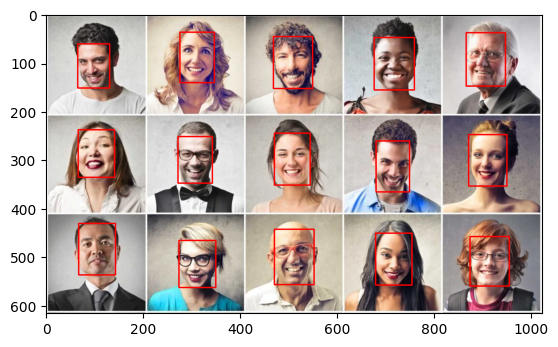

In [6]:
plt.imshow(img)
plt.show()

## Working with video

In [7]:
cap = cv2.VideoCapture('input/video.mp4')
 
#draw stuff that goes on every frame here
frames_tracked = []
videodims = (640, 360)
while cap.isOpened():
    ret, frame = cap.read()
 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    faces = detector.detect_faces(frame)
    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(frame, (x, y), (x + width, y + height), (255, 0, 0), 2) 
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(img)
    frames_tracked.append(im_pil.resize(videodims, Image.BILINEAR))

Can't receive frame (stream end?). Exiting ...


In [8]:
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
video = cv2.VideoWriter("output/tracked_video1.mp4",fourcc, 20, videodims)
for i in range(len(frames_tracked)):
    video.write(cv2.cvtColor(np.array(frames_tracked[i]), cv2.COLOR_RGB2BGR))
video.release()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [9]:
display.Video('output/tracked_video1.mp4', width=640)

## Working with streaming video

In [10]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

2024-12-09 23:50:41.825 Python[91727:20522094] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


In [ ]:
videodims = (640, 360)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    faces = detector.detect_faces(frame)

    try:
        for face in faces:
            x, y, width, height = face['box']
            cv2.rectangle(frame, (x, y), (x + width, y + height), (255, 0, 0), 2) 
        
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        im_pil = Image.fromarray(img)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) == ord('q'):
            break
    except Exception:
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) == ord('q'):
            break
        continue

cap.release()
cv2.destroyAllWindows()